In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("Required libraries imported successfully!")

Required libraries imported successfully!


In [5]:
# Display basic information about the dataset
print("Dataset Shape:")
print(f"Features: {X.shape}")
print(f"Targets: {y.shape}")
print("\nFirst few rows of features:")
print(X.head())
print("\nFirst few rows of targets:")
print(y.head())
print("\nFeature column names:")
print(list(X.columns))
print("\nTarget column names:")
print(list(y.columns))

Dataset Shape:
Features: (303, 13)
Targets: (303, 1)

First few rows of features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

First few rows of targets:
   num
0    0
1    2
2    1
3    0
4    0

Feature column names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Target column names:
['num']


In [6]:
# Check for missing values
print("Missing values in features:")
missing_features = X.isnull().sum()
print(missing_features[missing_features > 0] if missing_features.sum() > 0 else "No missing values")
print(f"\nTotal missing values in features: {X.isnull().sum().sum()}")

print("\nMissing values in targets:")
missing_targets = y.isnull().sum()
print(missing_targets[missing_targets > 0] if missing_targets.sum() > 0 else "No missing values")
print(f"Total missing values in targets: {y.isnull().sum().sum()}")

# Check data types
print("\nData types in features:")
print(X.dtypes)
print("\nData types in targets:")
print(y.dtypes)

Missing values in features:
ca      4
thal    2
dtype: int64

Total missing values in features: 6

Missing values in targets:
No missing values
Total missing values in targets: 0

Data types in features:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Data types in targets:
num    int64
dtype: object


In [7]:
# Get detailed statistics
print("Descriptive statistics for features:")
print(X.describe())

# Identify column types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# Check unique values for each column to identify potential categorical columns
print("\nUnique values per column:")
for col in X.columns:
    unique_count = X[col].nunique()
    print(f"{col}: {unique_count} unique values")
    if unique_count <= 10:  # Show actual values for columns with few unique values
        print(f"  Values: {sorted(X[col].unique())}")

Descriptive statistics for features:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.

In [8]:
# Handle missing values
# Create copies of the original data
X_processed = X.copy()
y_processed = y.copy()

print("Handling missing values...")

# Handle missing values in features
if X_processed.isnull().sum().sum() > 0:
    # For numerical columns - use median imputation
    if numerical_cols:
        num_imputer = SimpleImputer(strategy='median')
        X_processed[numerical_cols] = num_imputer.fit_transform(X_processed[numerical_cols])
        print(f"Applied median imputation to numerical columns: {numerical_cols}")
    
    # For categorical columns - use most frequent value imputation
    if categorical_cols:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        X_processed[categorical_cols] = cat_imputer.fit_transform(X_processed[categorical_cols])
        print(f"Applied mode imputation to categorical columns: {categorical_cols}")
    
    print("Missing values in features handled successfully!")
else:
    print("No missing values found in features!")

# Handle missing values in targets
if y_processed.isnull().sum().sum() > 0:
    print(f"\nFound {y_processed.isnull().sum().sum()} missing values in targets")
    # Remove rows with missing target values
    mask = ~y_processed.isnull().any(axis=1)
    X_processed = X_processed[mask]
    y_processed = y_processed[mask]
    print(f"Removed {(~mask).sum()} rows with missing target values")
    print(f"New dataset shape: {X_processed.shape}")
else:
    print("No missing values found in targets!")

# Verify no missing values remain
print(f"\nFinal check - Missing values in features: {X_processed.isnull().sum().sum()}")
print(f"Final check - Missing values in targets: {y_processed.isnull().sum().sum()}")

Handling missing values...
Applied median imputation to numerical columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Missing values in features handled successfully!
No missing values found in targets!

Final check - Missing values in features: 0
Final check - Missing values in targets: 0


In [9]:
# Encode categorical variables
label_encoders = {}

print("Encoding categorical variables...")

# Update categorical columns list based on processed data
categorical_cols_processed = X_processed.select_dtypes(include=['object', 'category']).columns.tolist()

# Also check for numerical columns that might be categorical (few unique values)
for col in numerical_cols:
    if X_processed[col].nunique() <= 10 and col not in ['age']:  # Exclude age as it's truly numerical
        categorical_cols_processed.append(col)
        print(f"Treating {col} as categorical (only {X_processed[col].nunique()} unique values)")

if categorical_cols_processed:
    for col in categorical_cols_processed:
        if col in X_processed.columns:
            le = LabelEncoder()
            X_processed[col] = le.fit_transform(X_processed[col].astype(str))
            label_encoders[col] = le
            print(f"Encoded column '{col}': {len(le.classes_)} classes")
            print(f"  Classes: {le.classes_}")
else:
    print("No categorical columns found to encode")

# Handle target variable encoding if it's categorical
target_encoder = None
if y_processed.dtypes.iloc[0] == 'object' or y_processed.iloc[:, 0].nunique() <= 10:
    target_encoder = LabelEncoder()
    target_col_name = y_processed.columns[0]
    y_processed[target_col_name] = target_encoder.fit_transform(y_processed[target_col_name].astype(str))
    print(f"\nTarget variable '{target_col_name}' encoded successfully!")
    print(f"Target classes: {target_encoder.classes_}")
    print(f"Class distribution:")
    print(y_processed[target_col_name].value_counts().sort_index())
else:
    print("\nTarget variable is already numerical")

print(f"\nEncoding completed. Label encoders saved for {len(label_encoders)} features.")

Encoding categorical variables...
Treating sex as categorical (only 2 unique values)
Treating cp as categorical (only 4 unique values)
Treating fbs as categorical (only 2 unique values)
Treating restecg as categorical (only 3 unique values)
Treating exang as categorical (only 2 unique values)
Treating slope as categorical (only 3 unique values)
Treating ca as categorical (only 4 unique values)
Treating thal as categorical (only 3 unique values)
Encoded column 'sex': 2 classes
  Classes: ['0.0' '1.0']
Encoded column 'cp': 4 classes
  Classes: ['1.0' '2.0' '3.0' '4.0']
Encoded column 'fbs': 2 classes
  Classes: ['0.0' '1.0']
Encoded column 'restecg': 3 classes
  Classes: ['0.0' '1.0' '2.0']
Encoded column 'exang': 2 classes
  Classes: ['0.0' '1.0']
Encoded column 'slope': 3 classes
  Classes: ['1.0' '2.0' '3.0']
Encoded column 'ca': 4 classes
  Classes: ['0.0' '1.0' '2.0' '3.0']
Encoded column 'thal': 3 classes
  Classes: ['3.0' '6.0' '7.0']

Target variable 'num' encoded successfully!
T

In [10]:
# Feature Scaling
print("Performing feature scaling...")

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_processed), 
    columns=X_processed.columns,
    index=X_processed.index
)

print("Features scaled successfully using StandardScaler!")
print(f"\nOriginal feature statistics:")
print(X_processed.describe().round(3))
print(f"\nScaled feature statistics:")
print(X_scaled.describe().round(3))

# Verify scaling worked correctly (mean ≈ 0, std ≈ 1)
print("\nScaling verification (should be close to 0 for mean, 1 for std):")
print(f"Mean of scaled features: {X_scaled.mean().round(6).tolist()}")
print(f"Std of scaled features: {X_scaled.std().round(6).tolist()}")

Performing feature scaling...
Features scaled successfully using StandardScaler!

Original feature statistics:
           age      sex       cp  trestbps     chol      fbs  restecg  \
count  303.000  303.000  303.000    303.00  303.000  303.000  303.000   
mean    54.439    0.680    2.158    131.69  246.693    0.149    0.990   
std      9.039    0.467    0.960     17.60   51.777    0.356    0.995   
min     29.000    0.000    0.000     94.00  126.000    0.000    0.000   
25%     48.000    0.000    2.000    120.00  211.000    0.000    0.000   
50%     56.000    1.000    2.000    130.00  241.000    0.000    1.000   
75%     61.000    1.000    3.000    140.00  275.000    0.000    2.000   
max     77.000    1.000    3.000    200.00  564.000    1.000    2.000   

       thalach    exang  oldpeak    slope       ca     thal  
count  303.000  303.000  303.000  303.000  303.000  303.000  
mean   149.607    0.327    1.040    0.601    0.663    0.832  
std     22.875    0.470    1.161    0.616    

In [11]:
# Detect outliers using IQR method
def detect_outliers_iqr(df, columns=None):
    """Detect outliers using the Interquartile Range (IQR) method"""
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    outliers_info = {}
    total_outliers = 0
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_indices = df[outlier_mask].index.tolist()
        outliers_info[col] = {
            'count': len(outlier_indices),
            'indices': outlier_indices,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'percentage': (len(outlier_indices) / len(df)) * 100
        }
        total_outliers += len(outlier_indices)
        
    return outliers_info, total_outliers

# Detect outliers in original processed data (before scaling)
print("Detecting outliers using IQR method...")
outliers_info, total_outliers = detect_outliers_iqr(X_processed)

print(f"\nOutlier Detection Results:")
print(f"Total data points: {len(X_processed)}")
print(f"Total outlier instances: {total_outliers}")
print(f"Percentage of outliers: {(total_outliers / len(X_processed)) * 100:.2f}%")

print("\nOutliers by feature:")
for col, info in outliers_info.items():
    if info['count'] > 0:
        print(f"{col}: {info['count']} outliers ({info['percentage']:.1f}%)")
        print(f"  Valid range: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")

# Show features with no outliers
no_outliers = [col for col, info in outliers_info.items() if info['count'] == 0]
if no_outliers:
    print(f"\nFeatures with no outliers: {no_outliers}")

Detecting outliers using IQR method...

Outlier Detection Results:
Total data points: 303
Total outlier instances: 108
Percentage of outliers: 35.64%

Outliers by feature:
cp: 23 outliers (7.6%)
  Valid range: [0.50, 4.50]
trestbps: 9 outliers (3.0%)
  Valid range: [90.00, 170.00]
chol: 5 outliers (1.7%)
  Valid range: [115.00, 371.00]
fbs: 45 outliers (14.9%)
  Valid range: [0.00, 0.00]
thalach: 1 outliers (0.3%)
  Valid range: [84.75, 214.75]
oldpeak: 5 outliers (1.7%)
  Valid range: [-2.40, 4.00]
ca: 20 outliers (6.6%)
  Valid range: [-1.50, 2.50]

Features with no outliers: ['age', 'sex', 'restecg', 'exang', 'slope', 'thal']


Creating visualization of preprocessing results...


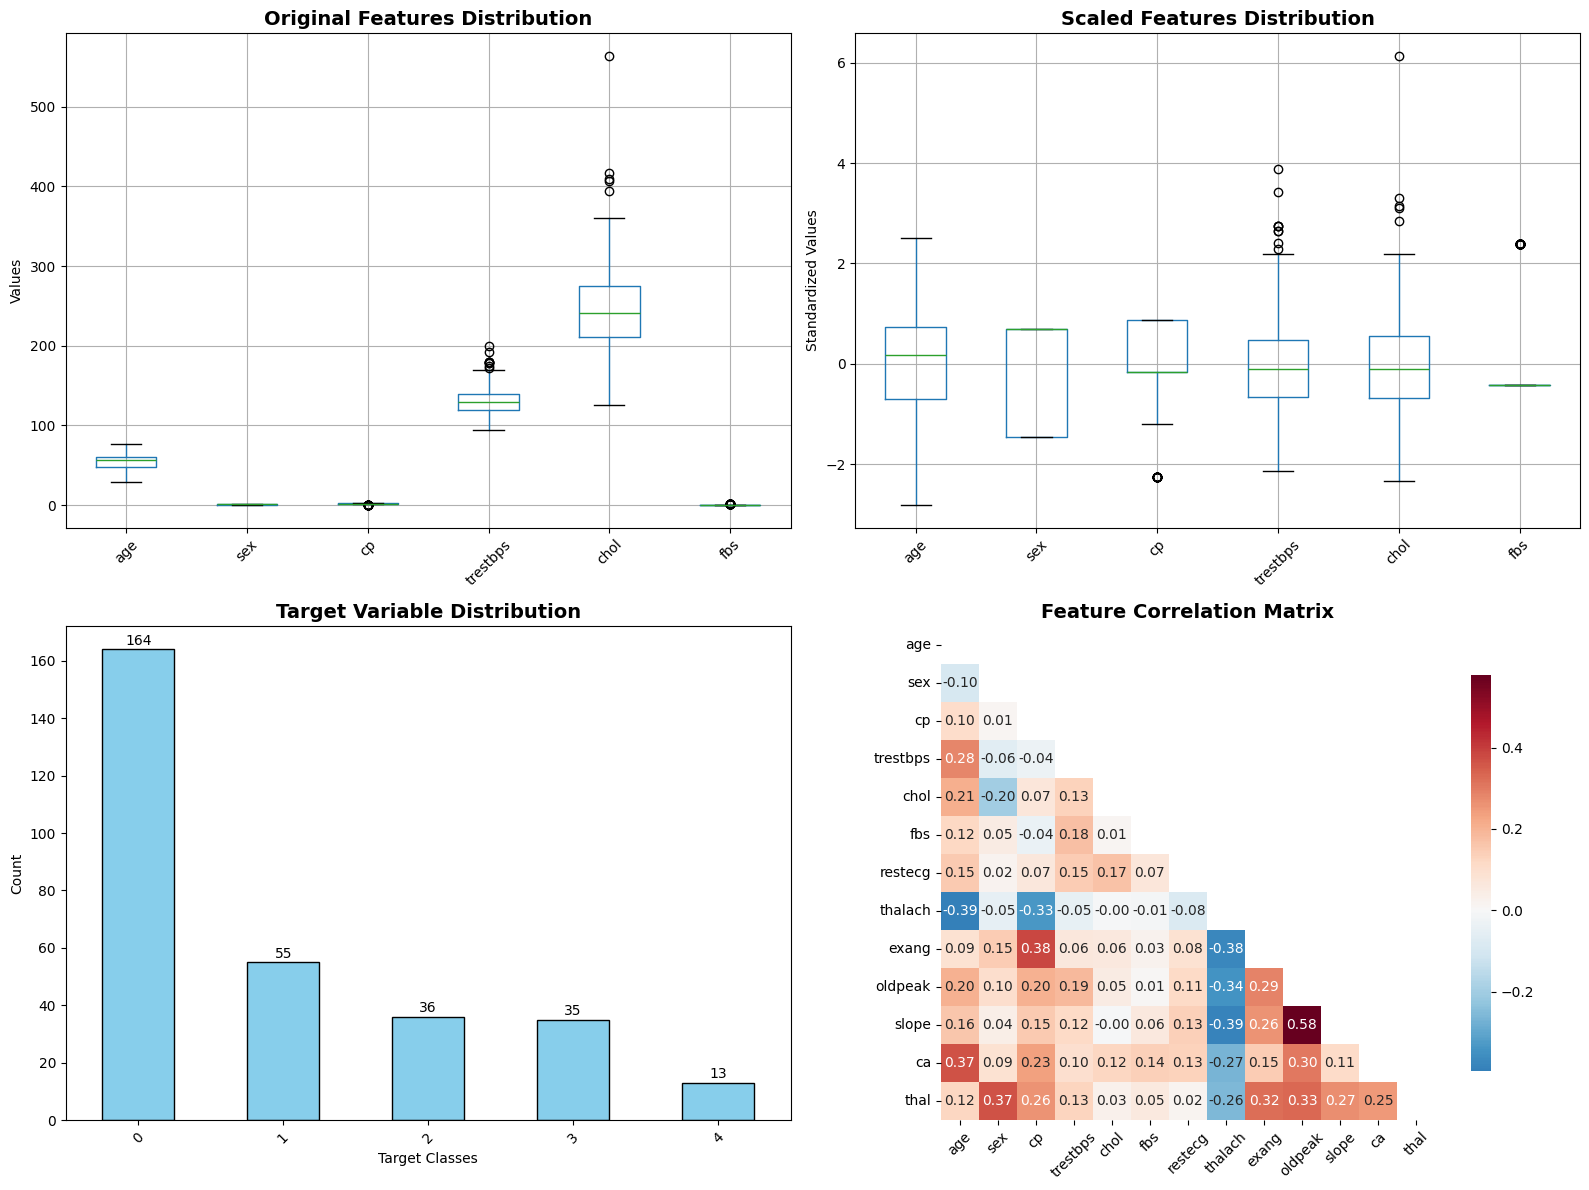


Preprocessing Statistics Summary:
• Dataset shape after preprocessing: (303, 13)
• Number of features: 13
• Number of samples: 303
• Target classes: 5
• Features with outliers: 7


In [12]:
# Visualize the preprocessing results
print("Creating visualization of preprocessing results...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Original vs Scaled features comparison (box plots)
if len(X_processed.columns) > 0:
    # Select first 6 features for visualization
    features_to_plot = X_processed.columns[:6]
    
    # Box plot of original features
    X_processed[features_to_plot].boxplot(ax=axes[0,0])
    axes[0,0].set_title('Original Features Distribution', fontsize=14, fontweight='bold')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].set_ylabel('Values')
    
    # Box plot of scaled features
    X_scaled[features_to_plot].boxplot(ax=axes[0,1])
    axes[0,1].set_title('Scaled Features Distribution', fontsize=14, fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].set_ylabel('Standardized Values')

# 2. Target variable distribution
if len(y_processed.columns) >= 1:
    target_counts = y_processed.iloc[:, 0].value_counts().sort_index()
    target_counts.plot(kind='bar', ax=axes[1,0], color='skyblue', edgecolor='black')
    axes[1,0].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')
    axes[1,0].set_xlabel('Target Classes')
    axes[1,0].set_ylabel('Count')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(target_counts.values):
        axes[1,0].text(i, v + 0.5, str(v), ha='center', va='bottom')

# 3. Feature correlation heatmap (using scaled features)
if len(X_scaled.columns) > 1:
    correlation_matrix = X_scaled.corr()
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Show only lower triangle
    
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, ax=axes[1,1], fmt='.2f', cbar_kws={'shrink': 0.8})
    axes[1,1].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

# Additional statistics
print("\nPreprocessing Statistics Summary:")
print(f"• Dataset shape after preprocessing: {X_scaled.shape}")
print(f"• Number of features: {len(X_scaled.columns)}")
print(f"• Number of samples: {len(X_scaled)}")
print(f"• Target classes: {y_processed.iloc[:, 0].nunique()}")
print(f"• Features with outliers: {len([col for col, info in outliers_info.items() if info['count'] > 0])}")

In [13]:
# Final preprocessing summary and validation
print("=" * 60)
print("           DATA PREPROCESSING SUMMARY")
print("=" * 60)

# Original vs Final shapes
print(f"\n📊 DATASET DIMENSIONS:")
print(f"   Original features shape: {X.shape}")
print(f"   Final features shape:    {X_scaled.shape}")
print(f"   Original targets shape:  {y.shape}")
print(f"   Final targets shape:     {y_processed.shape}")

# Data quality checks
print(f"\n🔍 DATA QUALITY CHECKS:")
print(f"   Missing values in features: {X_scaled.isnull().sum().sum()}")
print(f"   Missing values in targets:  {y_processed.isnull().sum().sum()}")
print(f"   Infinite values in features: {np.isinf(X_scaled).sum().sum()}")
print(f"   Duplicate rows: {X_scaled.duplicated().sum()}")

# Feature information
print(f"\n📋 FEATURE INFORMATION:")
print(f"   Total features: {len(X_scaled.columns)}")
print(f"   Feature names: {list(X_scaled.columns)}")
print(f"   Encoded features: {len(label_encoders)} ({list(label_encoders.keys()) if label_encoders else 'None'})")

# Target information
print(f"\n🎯 TARGET INFORMATION:")
print(f"   Target column: {y_processed.columns[0]}")
if target_encoder:
    print(f"   Target classes: {list(target_encoder.classes_)}")
    print(f"   Class distribution: {dict(y_processed.iloc[:, 0].value_counts().sort_index())}")
else:
    print(f"   Target type: Numerical")
    print(f"   Target range: [{y_processed.iloc[:, 0].min():.2f}, {y_processed.iloc[:, 0].max():.2f}]")

# Preprocessing objects available for reuse
print(f"\n🔧 PREPROCESSING OBJECTS CREATED:")
print(f"   ✅ X_scaled: Preprocessed and scaled features")
print(f"   ✅ y_processed: Preprocessed target variable")
print(f"   ✅ scaler: Fitted StandardScaler object")
print(f"   ✅ label_encoders: Dictionary of fitted LabelEncoders ({len(label_encoders)} encoders)")
if target_encoder:
    print(f"   ✅ target_encoder: Fitted LabelEncoder for target variable")

print(f"\n🎉 DATA PREPROCESSING COMPLETED SUCCESSFULLY!")
print(f"   Your data is now ready for machine learning model training.")
print("=" * 60)

# Quick data preview
print("\n📋 FINAL DATA PREVIEW:")
print("\nProcessed Features (first 5 rows):")
print(X_scaled.head())
print("\nProcessed Targets (first 10 values):")
print(y_processed.head(10).T)

           DATA PREPROCESSING SUMMARY

📊 DATASET DIMENSIONS:
   Original features shape: (303, 13)
   Final features shape:    (303, 13)
   Original targets shape:  (303, 1)
   Final targets shape:     (303, 1)

🔍 DATA QUALITY CHECKS:
   Missing values in features: 0
   Missing values in targets:  0
   Infinite values in features: 0
   Duplicate rows: 0

📋 FEATURE INFORMATION:
   Total features: 13
   Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
   Encoded features: 8 (['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

🎯 TARGET INFORMATION:
   Target column: num
   Target classes: ['0', '1', '2', '3', '4']
   Class distribution: {0: np.int64(164), 1: np.int64(55), 2: np.int64(36), 3: np.int64(35), 4: np.int64(13)}

🔧 PREPROCESSING OBJECTS CREATED:
   ✅ X_scaled: Preprocessed and scaled features
   ✅ y_processed: Preprocessed target variable
   ✅ scaler: Fitted StandardScaler object
   ✅ la

In [14]:
# Combine the cleaned features and target into a single DataFrame for future use
df_cleaned = pd.concat([X_scaled, y_processed], axis=1)
print("Combined cleaned features and target:")
print(df_cleaned.head())

Combined cleaned features and target:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  num  
0  0.017197 -0.696631  1.087338  2.274579 -0.711131  0.176225    0  
1 -1.821905  1.435481  0.397182  0.649113  2.504881 -0.870759    2  
2 -0.902354  1.435481  1.346147  0.649113  1.432877  1.223208    1  
3  1.637359 -0.696631  2.122573  2.274579 -0.711131 -0.870759    0  
4  0.980537 -0.696631  0.310912 -0.976352 -0.711131 -0.870759    0  


In [15]:
df_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.176225,0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.870759,2
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.223208,1
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.870759,0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.870759,0


In [16]:
# Save the cleaned dataframe to a CSV file
df_cleaned.to_csv('heart_disease_cleaned.csv', index=False)
print("Cleaned dataframe saved to 'heart_disease_cleaned.csv'")

Cleaned dataframe saved to 'heart_disease_cleaned.csv'
